## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

In [84]:
! git clone https://www.github.com/DS3001/kmc

fatal: destination path 'kmc' already exists and is not an empty directory.


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.**

In [125]:
df = pd.read_csv('./kmc/data/airbnb_hw.csv', low_memory = False)

In [126]:
#create dummy variables
price = df['Price']
beds = df['Beds']
no_of_reviews = df['Number Of Reviews']
review_scores_rating = df['Review Scores Rating']

In [127]:
price.value_counts()

150      1481
100      1207
200      1059
125       889
75        873
         ... 
840         1
306         1
2,695       1
2,520       1
291         1
Name: Price, Length: 511, dtype: int64

In [128]:
price = price.str.replace(',','') #remove commas
price = pd.to_numeric(price,errors='coerce') #convert to numeric
df['Price'] = price #put dummy variable back in df

In [129]:
beds.value_counts()

1.0     20344
2.0      6610
3.0      2071
4.0       783
5.0       284
6.0       177
7.0        45
8.0        24
10.0       16
9.0        15
16.0       13
11.0        5
12.0        4
0.0         2
Name: Beds, dtype: int64

In [130]:
beds = beds.replace(np.nan, 1) #replace na with 1 bed
beds = pd.to_numeric(beds,errors='coerce')
df['Beds'] = beds #put dummy variable bac in df

In [131]:
no_of_reviews.value_counts() #already clean

0      7814
1      3572
2      2457
3      1764
4      1382
       ... 
216       1
191       1
213       1
178       1
130       1
Name: Number Of Reviews, Length: 205, dtype: int64

In [132]:
print(review_scores_rating.describe())
print(review_scores_rating.shape)

count    22155.000000
mean        91.993230
std          8.850373
min         20.000000
25%         89.000000
50%         94.000000
75%        100.000000
max        100.000000
Name: Review Scores Rating, dtype: float64
(30478,)


In [133]:
#Around 8000 missing values -> delete missing values for cleaner data

In [134]:
df = df.dropna()

**2. Maxmin normalize the data and remove any nan's (KMeans from sklearn doesn't accept nan input).**

In [138]:
df2 = df.loc[:,['Beds','Number Of Reviews','Review Scores Rating']]

In [139]:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

In [140]:
df2 = df2.apply(maxmin)

In [141]:
df2.describe()

,Beds,Number Of Reviews,Review Scores Rating
count,22053.000000,22053.000000,22053.000000
mean,0.097229,0.060322,0.899865
std,0.065165,0.094597,0.110741
min,0.000000,0.000000,0.000000
25%,0.062500,0.003906,0.862500
50%,0.062500,0.023438,0.925000
75%,0.125000,0.074219,1.000000
max,1.000000,1.000000,1.000000


**3. Use sklearn's KMeans module to cluster the data by Beds, Number of Reviews, and Review Scores Rating for k=6.**

In [142]:
from sklearn.cluster import KMeans # Import kmc

model = KMeans(n_clusters=6, max_iter=300, n_init = 10,  random_state=0) # Pass centroids and options into the model

model = model.fit(df2) # Initialize a kmc model

**4. Use seaborn's .pairplot() to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.**

In [143]:
df2['cluster'] = model.labels_

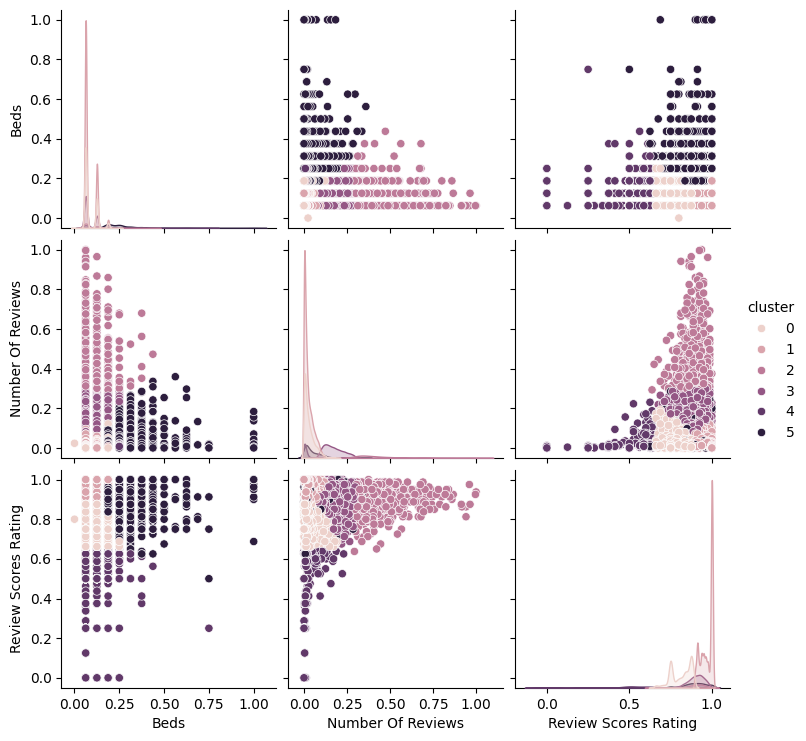

In [144]:
sns.pairplot(data=df2,hue='cluster')

**5. Use .groupby and .describe to compute the average price for each cluster. Which clusters have the highest rental prices?**

In [145]:
df['cluster'] = model.labels_
X = df.loc[:,['Price', 'cluster']]
X.groupby('cluster').describe()

Price                                                            
           count        mean         std   min    25%    50%    75%      max
cluster                                                                     
0         5543.0  131.640808  102.816132  20.0   75.0  110.0  169.0   5000.0
1        10495.0  152.323773  147.392855  10.0   85.0  130.0  190.0  10000.0
2          778.0  133.354756   83.549707  27.0   80.0  110.0  169.0    875.0
3         2995.0  141.513189   84.131645  22.0   87.0  125.0  175.0   1000.0
4          631.0  133.483360  215.660762  25.0   65.0   99.0  150.0   5000.0
5         1611.0  293.414029  263.135009  27.0  150.0  229.0  350.0   4500.0

According to the chart, cluster 5 has the highest rental prices.

**6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.**

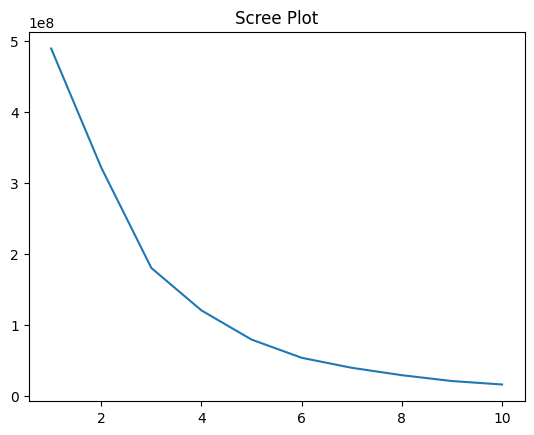

In [146]:
k_bar = 10
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?